<a href="https://colab.research.google.com/github/binary-alkemi/RDKit_Practice/blob/master/RDKit_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Install RDKit. 
!pip install kora
import kora.install.rdkit

In [63]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

In [64]:
##Confirming RDKit version
from rdkit import rdBase
rdBase.rdkitVersion

'2020.03.3'

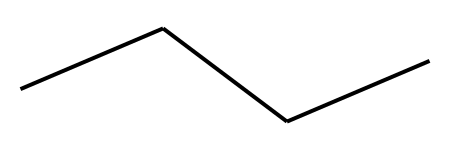

In [65]:
mol = Chem.MolFromSmiles('CCCC')
mol

In [66]:
s = Chem.MolToSmiles(mol)
s

'CCCC'

In [67]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

In [68]:
## last two are canonical and isomeric SMILES for L-Cysteine. See the difference in images below.
smiles_list = ['CC(C(=O)O)N' , 'C1=C(NC=N1)CC(C(=O)O)N' , 'C(C(C(=O)O)N)S', 'C([C@@H](C(=O)O)N)S']

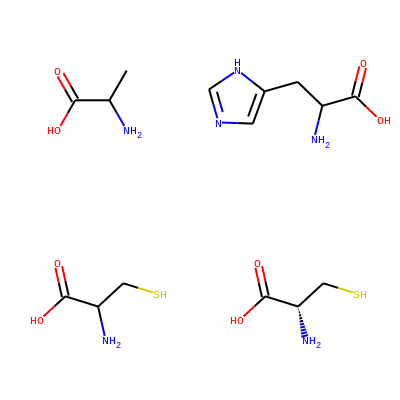

In [69]:
mol_list = []
for x in smiles_list:
  mol1 = Chem.MolFromSmiles(x)
  mol_list.append(mol1)

img = Draw.MolsToGridImage(mol_list, molsPerRow=2)
img

In [70]:
pattern = Chem.MolFromSmarts('[r5]')

In [71]:
for x in mol_list:
  print(x.HasSubstructMatch(pattern))

False
True
False
False


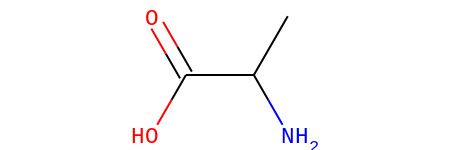

In [72]:
mol_list[0]

In [80]:
## empty dictionary
bi = {}
## 
glycine = mol_list[0]

## input: molecule, number of neighbouring bonds, number of bits, 
## VIMP : assigning bitInfo to empty dictionary

fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024, bitInfo=bi)
### numpy arrays with zeroes
fp_arr = np.zeros((1,))
## RDKit utility for overlapping arraywithzeroes and our molecule Bits to have numpy array
DataStructs.ConvertToNumpyArray(fp, fp_arr)
#fp_arr
np.nonzero(fp_arr)

(array([  1,  33, 132, 147, 283, 389, 473, 650, 786, 807, 820, 893]),)

In [81]:
list(np.nonzero(fp_arr))

[array([  1,  33, 132, 147, 283, 389, 473, 650, 786, 807, 820, 893])]

In [82]:
list(fp.GetOnBits())

[1, 33, 132, 147, 283, 389, 473, 650, 786, 807, 820, 893]

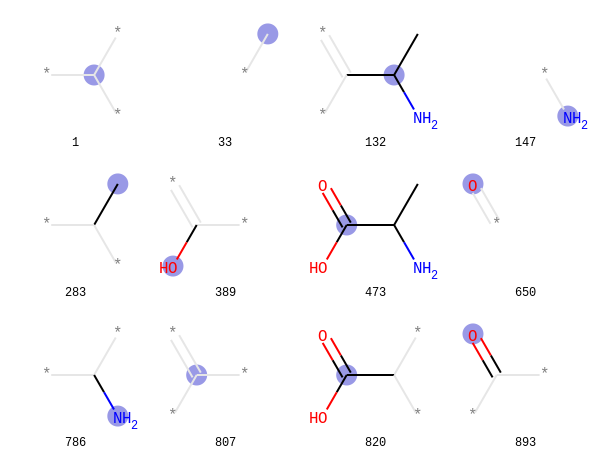

In [85]:
prints = [(glycine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

##**Now we will check Tanimoto Similarity between molecules**


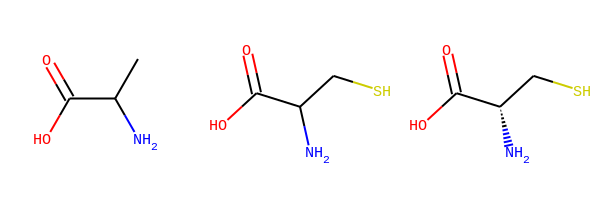

In [79]:
cysteine = mol_list[2]
cyst_iso = mol_list[3]
img = Draw.MolsToGridImage([glycine,cysteine,cyst_iso])
img

In [88]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits=1024, bitInfo=bi)
fp3 = AllChem.GetMorganFingerprintAsBitVect(cyst_iso, 2, nBits=1024, bitInfo=bi)
print('cys' , list(fp2.GetOnBits()))
print('cys_iso' , list(fp3.GetOnBits()))
print('gly' , list(fp.GetOnBits()))

## This shows isomeric or canonical both have same fingerprints.

cys [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
cys_iso [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
gly [1, 33, 132, 147, 283, 389, 473, 650, 786, 807, 820, 893]


In [89]:
# let's assign these bits to sets
g = set(list(fp.GetOnBits()))
c = set(list(fp2.GetOnBits()))

In [90]:
## getting common elements 
common = g & c
print(common)

{1, 389, 807, 650, 786, 147, 820, 893}


In [91]:
combined = g | c
print(combined)

{1, 321, 132, 389, 902, 650, 80, 786, 147, 403, 473, 283, 33, 229, 807, 48, 435, 820, 825, 893}


In [92]:
sim = len(common)/len(combined)
print(sim)

0.4


In [93]:
print(DataStructs.TanimotoSimilarity(fp,fp2))

0.4
